In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/HPG 1D.csv')
df['date'] = pd.to_datetime(df['date'])
df

,date,open,high,low,close,Volume
0,2012-01-13,1149.197186,1149.197186,1128.675808,1135.516267,3684665
1,2012-01-16,1142.356727,1176.559024,1142.356727,1149.197186,3029894
2,2012-01-17,1149.197186,1162.878105,1142.356727,1149.197186,2679914
3,2012-01-18,1149.197186,1156.037646,1142.356727,1156.037646,1770468
4,2012-01-19,1162.878105,1197.080402,1156.037646,1197.080402,3271107
...,...,...,...,...,...,...
2751,2023-02-16,20950.000000,21400.000000,20600.000000,21300.000000,23914900
2752,2023-02-17,21300.000000,21350.000000,21000.000000,21000.000000,13693700
2753,2023-02-20,21000.000000,21900.000000,21000.000000,21900.000000,25741700
2754,2023-02-21,22050.000000,22300.000000,21600.000000,21600.000000,21439100


In [ ]:
df.agg({'open':['min', 'mean', 'std', 'max'],
        'high':['min', 'mean', 'std', 'max'],
        'low':['min', 'mean', 'std', 'max'],
        'close':['min', 'mean', 'std', 'max'],
        'Volume':['min', 'mean', 'std', 'max']})

,open,high,low,close,Volume
min,1142.356727,1149.197186,1121.835348,1135.516267,8.770500e+04
mean,11599.344361,11765.236616,11441.810699,11596.169838,1.866336e+07
std,10560.362474,10706.505436,10407.131156,10540.500172,1.433125e+07
max,44615.398000,44923.090400,44230.782500,44615.398000,1.093627e+08


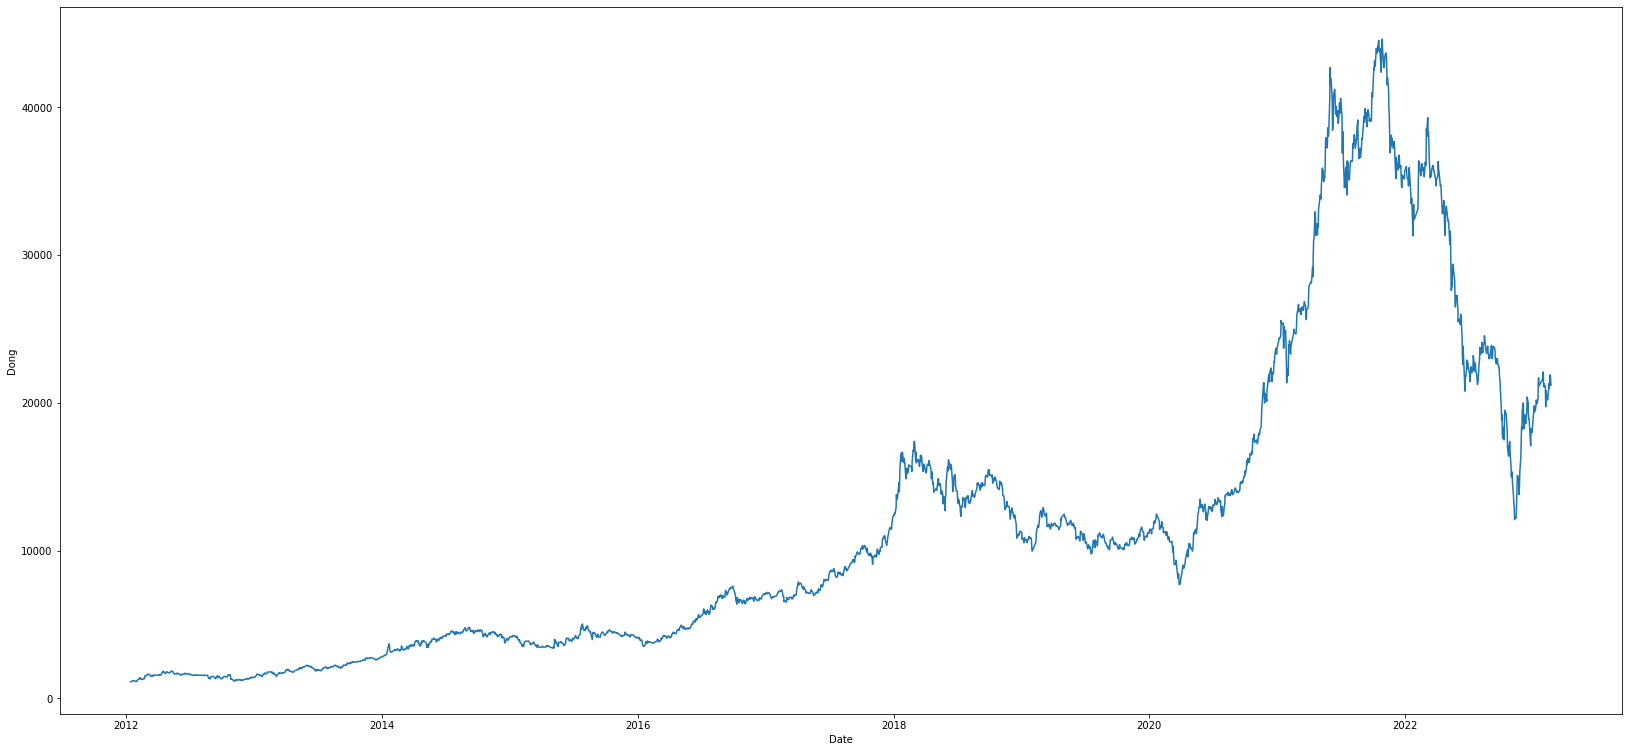

In [ ]:
plt.figure(figsize=(28, 13))
plt.plot(df['date'], df['close'])
plt.ylabel("Dong")
plt.xlabel("Date")
plt.show()

In [ ]:
df['day_of_week'] = (df['date'].dt.dayofweek)+2

In [ ]:
df

,date,open,high,low,close,Volume,day_of_week
0,2012-01-13,1149.197186,1149.197186,1128.675808,1135.516267,3684665,6
1,2012-01-16,1142.356727,1176.559024,1142.356727,1149.197186,3029894,2
2,2012-01-17,1149.197186,1162.878105,1142.356727,1149.197186,2679914,3
3,2012-01-18,1149.197186,1156.037646,1142.356727,1156.037646,1770468,4
4,2012-01-19,1162.878105,1197.080402,1156.037646,1197.080402,3271107,5
...,...,...,...,...,...,...,...
2751,2023-02-16,20950.000000,21400.000000,20600.000000,21300.000000,23914900,5
2752,2023-02-17,21300.000000,21350.000000,21000.000000,21000.000000,13693700,6
2753,2023-02-20,21000.000000,21900.000000,21000.000000,21900.000000,25741700,2
2754,2023-02-21,22050.000000,22300.000000,21600.000000,21600.000000,21439100,3


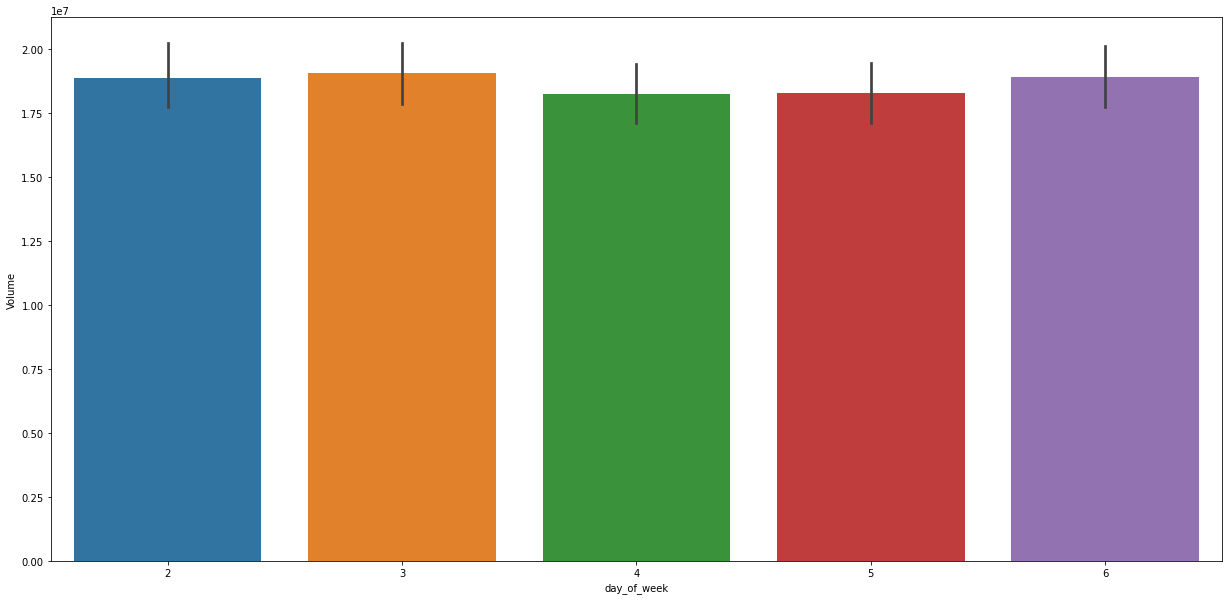

In [ ]:
fig, ax = plt.subplots(figsize=(21, 10))
sns.barplot(x='day_of_week', y='Volume', data=df)
plt.show()

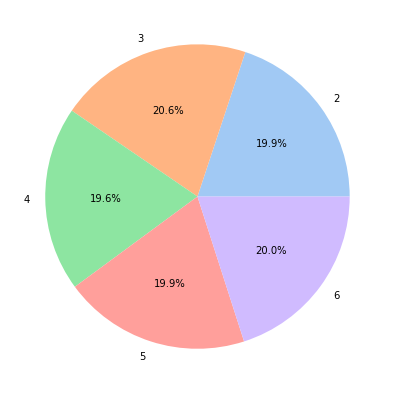

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
gb = df.groupby(['day_of_week'])['Volume'].agg(['sum'])
labels = gb.index
data = list(gb['sum'])
colors = sns.color_palette('pastel')
plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False)
plt.show()

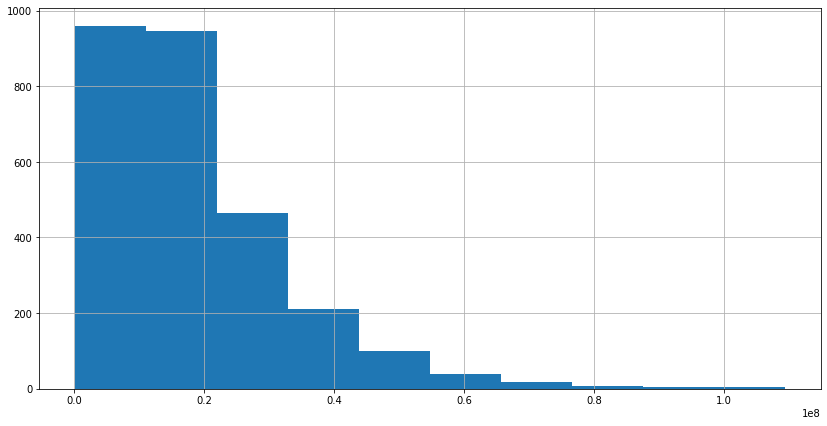

In [ ]:
fig, ax = plt.subplots(figsize=(14, 7))
df['Volume'].hist()
plt.show()

In [ ]:
skewness = skew(df['Volume'])
skewness

1.6382102277187647

<Figure size 2016x936 with 0 Axes>

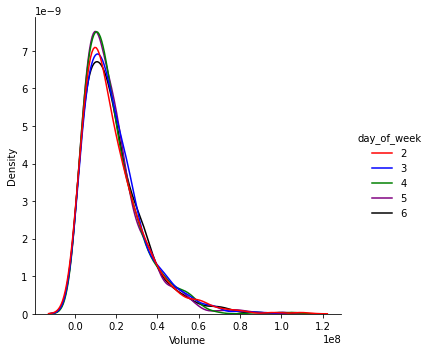

In [ ]:
plt.figure(figsize=(28, 13))
sns.displot(df, x='Volume', hue='day_of_week', kind='kde', palette=['red', 'blue', 'green', 'purple', 'black'])
plt.show()

In [ ]:
df['Volume'].describe()

count    2.756000e+03
mean     1.866336e+07
std      1.433125e+07
min      8.770500e+04
25%      8.374930e+06
50%      1.504486e+07
75%      2.502742e+07
max      1.093627e+08
Name: Volume, dtype: float64

<Axes: >

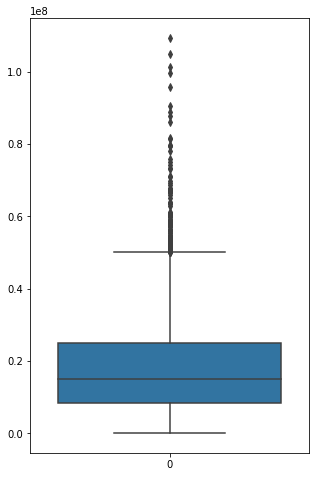

In [ ]:
fig, ax = plt.subplots(figsize=(5, 8))
sns.boxplot(data=df['Volume'])

In [ ]:
df.groupby('day_of_week')['Volume'].describe()

,count,mean,std,min,25%,50%,75%,max
day_of_week,,,,,,,,
2,543.0,1.885910e+07,1.514048e+07,112391.0,8247045.50,14806749.0,25264162.0,109362673.0
3,555.0,1.904600e+07,1.424190e+07,87705.0,8637302.00,15532900.0,25365893.0,90446516.0
4,554.0,1.823580e+07,1.376236e+07,257410.0,8503960.25,14594049.0,24536247.5,104768973.0
5,559.0,1.826811e+07,1.405835e+07,173507.0,8317540.00,14983132.0,24160151.0,101197169.0
6,545.0,1.891868e+07,1.446812e+07,138706.0,8501889.00,15367100.0,26020662.0,99658800.0


<Axes: xlabel='day_of_week', ylabel='Volume'>

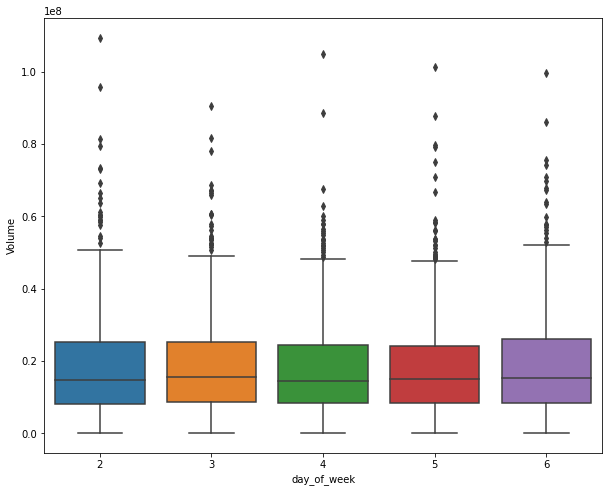

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='day_of_week', y='Volume')